In [2]:
%matplotlib notebook

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from scipy.optimize import minimize
import random

/var/folders/_k/2mty61s53qv_0k67g1cbzvn40000gn/T/ipykernel_24615/762018770.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


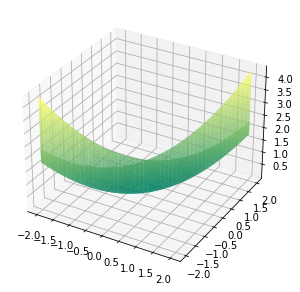

In [3]:
#I just wanted to graph it to see it
f = lambda x, y: ((x**2)/2) + (y**2/3) + (x*y/4)

x_min, x_max = -2, 2
y_min, y_max = -2, 2

xl = np.linspace(x_min, x_max, 100)
yl = np.linspace(y_min, y_max, 100)

nx, ny = np.meshgrid(xl, yl) #This will create the meshgrid, so it will essentially be a 2-d array

z = f(nx, ny) #THis will be the z-axis

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
plt.show()

In [57]:
#This will be the fixed derivative equation
def derivative(f, x, y, d=0.001):
    fx = (f(x+d/2,y) - f(x-d/2,y))/d
    fy = (f(x,y+d/2) - f(x, y-d/2))/d
    return fx, fy


#This will be the minimization function
def minimization(f, x, y, N=10000):
    
    x_now, y_now = x, y #This will save the current x and y
    history = [[x_now, y_now]] #This will be the history of points that were iteratated through
    converged = False
    for _ in range(N):
        dfx, dfy = derivative(f, x_now, y_now)
        x_next = x_now - dfx*0.05
        y_next = y_now - dfy*0.05
        
        if f(x_next, y_next) > f(x_now, y_now):
            converged = True
            break
        else:
            x_now, y_now = x_next, y_next
            history.append([x_now, y_now])
            
    return converged, history, x_now, y_now


#Pick a random starting x and y
x = (random.random() * 4) - 2
y = (random.random() * 4) - 2

In [58]:
c, h, xn, yn = minimization(f, x, y)

In [59]:
print(c)
print(xn, yn)
print(len(h))

True
5.373365259144468e-20 -5.225134493374965e-20
1593


In [60]:
print(f(xn, yn))

1.651806488844468e-39


In [64]:
#((x**2)/2) + (y**2/3) + (x*y/4)
def f(p):
    return ((p[0]**2)/2) + ((p[1]**2)/3) + (p[0]*p[1]/4)



#This will be the scipy library attempt with the conjugate decent, 
#I expect this to run faster, and have a more accurate minimum
res = minimize(f, [x,y], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 33
         Gradient evaluations: 11
